In [34]:
import requests
from bs4 import BeautifulSoup
from newspaper import Article  
import csv 
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
url = "https://timesofindia.indiatimes.com/world"
r = requests.get(url)

In [36]:
soup = BeautifulSoup(r.content, 'html.parser') 
articles_table = soup.findAll('a', attrs = {'class':'w_img'})

In [37]:
news=[]
for row in articles_table:
    if not row['href'].startswith('http'):
        news.append('https://timesofindia.indiatimes.com'+row['href'])

In [38]:
dataset=[]
for i in news:
    article = Article(i, language="en")
    article.download() 
    article.parse() 
    article.nlp() 
    data={}
    data['Title']=article.title
    data['Text']=article.text
    data['Summary']=article.summary
    data['Keywords']=article.keywords
    dataset.append(data)

df=pd.DataFrame(dataset)
df.head(10)

,Title,Text,Summary,Keywords
0,"Xi Jinping challenges US global leadership, wa...",BEIJING: Chinese President Xi Jinping called f...,BEIJING: Chinese President Xi Jinping called f...,"[xi, leadership, challenges, world, green, cou..."
1,Covid-19: UK adds India to travel red list ami...,"Apr 20, 2021, 09:14AM IST\n\nSource: Times Now...","Apr 20, 2021, 09:14AM ISTSource: Times NowAs c...","[india, vital, covid19, surge, amid, cases, va..."
2,"3 dead, 2 wounded in shooting at Wisconsin tavern","Apr 19, 2021, 10:13AM IST\n\nSource: AP\n\nPol...","Apr 19, 2021, 10:13AM ISTSource: APPolice appr...","[wounded, men, dead, spokesman, southeastern, ..."
3,Highlights of funeral service for Prince Philip,"Apr 18, 2021, 10:26AM IST\n\nSource: AP\n\nAs ...","Apr 18, 2021, 10:26AM ISTSource: APAs military...","[funeral, royals, rest, procession, philip, pr..."
4,Silence and gun salutes for Duke of Edinburgh,"Apr 18, 2021, 10:25AM IST\n\nSource: AP\n\nCan...","Apr 18, 2021, 10:25AM ISTSource: APCannon fire...","[funeral, st, salutes, duke, philip, prince, w..."
5,Canada honours Duke with memorial and gun salute,"Apr 18, 2021, 10:27AM IST\n\nSource: AP\n\nCan...","Apr 18, 2021, 10:27AM ISTSource: APCanada held...","[duke, canada, philip, prince, salute, special..."
6,Queen and royal family at funeral of Prince Ph...,"Apr 18, 2021, 10:23AM IST\n\nSource: AP\n\nAs ...","Apr 18, 2021, 10:23AM ISTSource: APAs military...","[funeral, steeped, philip, prince, uk, windsor..."
7,Harry and William walk together after Philip f...,"Apr 18, 2021, 10:22AM IST\n\nSource: AP\n\nPri...","Apr 18, 2021, 10:22AM ISTSource: APPrince Will...","[walk, funeral, duke, walking, philip, prince,..."
8,Tight-knit Sikh community in shock over shooting,"Apr 18, 2021, 10:29AM IST\n\nSource: AP\n\nFou...","Apr 18, 2021, 10:29AM ISTSource: APFour member...","[violence, stunned, victims, week, targeted, t..."
9,Pakistan suspends social media platforms amid ...,"Apr 16, 2021, 01:43PM IST\n\nSource: Times Now...","Apr 16, 2021, 01:43PM ISTSource: Times NowThe ...","[social, blocked, rallies, amid, media, youtub..."


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Importing the dataset
uci_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OnlineNewsPopularity/OnlineNewsPopularity.csv", quoting = 3, index_col = False)
display(uci_dataset.head())

#Cleaning the columns headers of whitespaces
arr = list(uci_dataset)
cleaned_columns = {x:x.lower().strip() for x in arr}
new_dataset = uci_dataset.rename(columns=cleaned_columns)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [41]:
# Get the features from dataset
features_raw = new_dataset.drop(['url',new_dataset.keys()[1],new_dataset.keys()[-1]], axis=1)
display(features_raw.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,lda_00,lda_01,lda_02,lda_03,lda_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


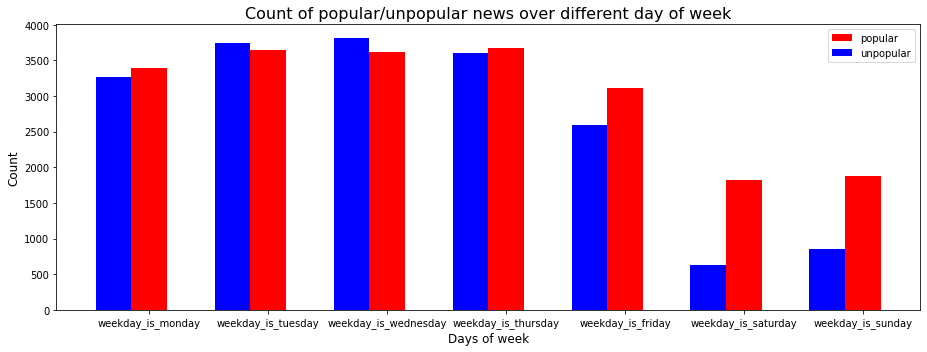

In [42]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[29:36]
unpop=new_dataset[new_dataset['shares']<1400]
pop=new_dataset[new_dataset['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

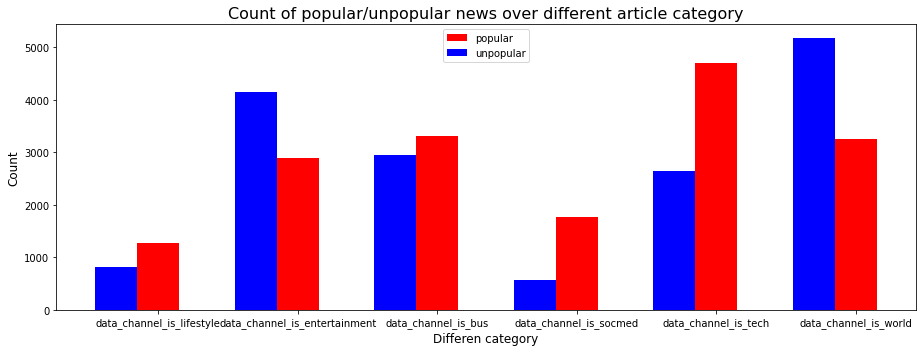

In [43]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()

In [44]:
#We are removing features which are not most relevant for our model
x = new_dataset.drop(['url','shares', 'timedelta', 'lda_00','lda_01',
                  'lda_02','lda_03','lda_04','num_self_hrefs', 
                  'kw_min_min', 'kw_max_min', 'kw_avg_min',
                  'kw_min_max','kw_max_max','kw_avg_max',
                  'kw_min_avg','kw_max_avg','kw_avg_avg',
                  'self_reference_min_shares','self_reference_max_shares',
                  'self_reference_avg_sharess','rate_positive_words',
                  'rate_negative_words','abs_title_subjectivity',
                  'abs_title_sentiment_polarity'], axis = 1)
y = new_dataset['shares']

In [45]:
#Splitting the new_dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0) 

#Fitting the random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [46]:
#Comparison of y_test and y_pred
pred_result = pd.DataFrame(list(y_test), y_pred)
pred_result.reset_index(0, inplace=True)
pred_result.columns = ['Predicted share','Actual shares']
print(pred_result)

      Predicted share  Actual shares
0             1792.16            919
1             3990.96           1600
2             9310.65          11700
3             2653.23          18000
4             7329.50           5800
...               ...            ...
7924          4500.39           3800
7925          7108.59           3900
7926          3193.47          12700
7927          5789.28            651
7928          3050.76           2200

[7929 rows x 2 columns]


In [47]:
#Converting the crawled new according to UCI_Dataset Using NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

stopwords=set(stopwords.words('english'))

In [49]:
#Tokenization:Tokenization is the process of tokenizing or splitting a string, text into a list of tokens
def tokenize(txt):
    return word_tokenize(txt)

#n_unique_tokens: Rate of unique words in the content
def n_unique_tokens(txt):
    txt=tokenize(txt)
    words = list(set(txt))   ##sets only store unique values
    n_unique_tokens=len(words)/len(txt)
    return n_unique_tokens

#average_token_length: Average length of the words in the content
def avg_token_length(txt):
    txt=tokenize(txt)
    length=[]
    for i in txt:
        length.append(len(i))
    return np.average(length)


#n_non_stop_words: Rate of non-stop words in the content
#n_non_stop_unique_tokens: Rate of unique non-stop words in content
def n_nonstop_words(txt):
    txt=tokenize(txt)
    nonstop_words = [i for i in txt if not i in stopwords]
    n_nonstop_words=len(nonstop_words)/len(txt)
    nonstop_unique_words = list(set(nonstop_words))
    n_nonstop_unique_tokens=len(nonstop_unique_words)/len(txt)
    return n_nonstop_words,n_nonstop_unique_tokens



import datefinder  #datefinder - extract dates from text
import datetime  

#from datetime import date 

#weekday #is_weekend
def day(txt):
    article_url=txt
    l1 = article_url.split("-")  #To remove the int value in url like "2140736"
    date_url = l1[0]             #which was getting was getting assigned as month
    if len(list(datefinder.find_dates(date_url)))>0:
        date_time=list(datefinder.find_dates(date_url))
        date=(str(date_time[0])).split()
        date=date[0]
        year, month, day = date.split('-')     
        weekday = datetime.date(int(year), int(month), int(day)) 
        return weekday.strftime("%A")  # ".strftime" gives a weekday from a date
    return "Monday"

#Polar words
positive_words=[]
negative_words=[]
def polarity(txt):
    tokenize_txt=tokenize(txt)
    for i in tokenize_txt:
        blob=TextBlob(i)
        polarity=blob.sentiment.polarity
        if polarity>0:
            positive_words.append(i)
        if polarity<0:
            negative_words.append(i)
    return positive_words,negative_words

#Polarity_rates
def rates(txt):
    txt=polarity(txt)
    positive_words=txt[0]
    negative_words=txt[1]
    global_rate_positive_words=(len(positive_words)/len(txt))/100
    global_rate_negative_words=(len(negative_words)/len(txt))/100
    positive_polarity=[]
    negative_polarity=[]
    for i in positive_words:
        blob_a=TextBlob(i)
        positive_polarity.append(blob_a.sentiment.polarity)
    for j in negative_words:
        blob_b=TextBlob(j)
        negative_polarity.append(blob_b.sentiment.polarity)
    min_positive_polarity=min(positive_polarity)
    min_negative_polarity=min(negative_polarity)
    max_positive_polarity=max(positive_polarity)
    max_negative_polarity=max(negative_polarity)
    avg_positive_polarity=np.average(positive_polarity)
    avg_negative_polarity=np.average(negative_polarity)
    return (global_rate_positive_words,global_rate_negative_words,
            avg_positive_polarity,min_positive_polarity,
            max_positive_polarity,avg_negative_polarity,
            min_negative_polarity,max_negative_polarity)

In [50]:
final_dataset=[]
for i in news:
    content={}
    article = Article(i, language="en")
    article.download() 
    article.parse()
    blob=TextBlob(article.text)
    #polarity=blob.sentiment.polarity
    title_blob=TextBlob(article.title)
    content['title']=article.title
    content['n_tokens_title']=len(tokenize(article.title))
    content['n_tokens_content']=len(tokenize(article.text))
    content['n_unique_tokens']=n_unique_tokens(article.text)
    content['n_non_stop_words']=n_nonstop_words(article.text)[0]
    content['n_non_stop_unique_tokens']=n_nonstop_words(article.text)[1]
    content['num_hrefs']=article.html.count("https://www.newindianexpress.com")
    content['num_imgs']=len(article.images)
    content['num_videos']=len(article.movies)
    content['average_token_length']=avg_token_length(article.text)
    content['num_keywords']=len(article.keywords)
    
    if "lifestyle" in article.url:
        content['data_channel_is_lifestyle']=1
    else:
        content['data_channel_is_lifestyle']=0
    if "entertainment" in article.url:
        content['data_channel_is_entertainment']=1
    else:
        content['data_channel_is_entertainment']=0
    if "business" in article.url:
        content['data_channel_is_bus']=1
    else:
        content['data_channel_is_bus']=0
    if "social media" or "facebook" or "whatsapp" in article.text.lower():
        data_channel_is_socmed=1
        data_channel_is_tech=0
        data_channel_is_world=0
    else:
        data_channel_is_socmed=0
    if ("technology" or "tech" in article.text.lower()) or ("technology" or "tech" in article.url):
        data_channel_is_tech=1
        data_channel_is_socmed=0
        data_channel_is_world=0
    else:
        data_channel_is_tech=0
    if "world" in article.url:
        data_channel_is_world=1
        data_channel_is_tech=0
        data_channel_is_socmed=0
    else:
        data_channel_is_world=0
        
    content['data_channel_is_socmed']=data_channel_is_socmed
    content['data_channel_is_tech']=data_channel_is_tech
    content['data_channel_is_world']=data_channel_is_world
    
    if day(i)=="Monday":
        content['weekday_is_monday']=1
    else:
        content['weekday_is_monday']=0
    if day(i)=="Tuesday":
        content['weekday_is_tuesday']=1
    else:
        content['weekday_is_tuesday']=0
    if day(i)=="Wednesday":
        content['weekday_is_wednesday']=1
    else:
        content['weekday_is_wednesday']=0
    if day(i)=="Thursday":
        content['weekday_is_thursday']=1
    else:
        content['weekday_is_thursday']=0
    if day(i)=="Friday":
        content['weekday_is_friday']=1
    else:
        content['weekday_is_friday']=0
    if day(i)=="Saturday":
        content['weekday_is_saturday']=1
        content['is_weekend']=1
    else:
        content['weekday_is_saturday']=0
    if day(i)=="Sunday":
        content['weekday_is_sunday']=1
        content['is_weekend']=1
    else:
        content['weekday_is_sunday']=0
        content['is_weekend']=0
        
    content['global_subjectivity']=blob.sentiment.subjectivity
    content['global_sentiment_polarity']=blob.sentiment.polarity
    content['global_rate_positive_words']=rates(article.text)[0]
    content['global_rate_negative_words']=rates(article.text)[1]
    content['avg_positive_polarity']=rates(article.text)[2]
    content['min_positive_polarity']=rates(article.text)[3]
    content['max_positive_polarity']=rates(article.text)[4]
    content['avg_negative_polarity']=rates(article.text)[5]
    content['min_negative_polarity']=rates(article.text)[6]
    content['max_negative_polarity']=rates(article.text)[7]    
    content['title_subjectivity']=title_blob.sentiment.subjectivity
    content['title_sentiment_polarity']=title_blob.sentiment.polarity
    final_dataset.append(content)

final_df=pd.DataFrame(final_dataset)
test_df=final_df.drop(['title'],axis=1)


predicted_shares = regressor.predict(test_df)

final_pred_result = pd.DataFrame(predicted_shares,final_df['title'])
final_pred_result.reset_index(0, inplace=True)
final_pred_result.columns = ['Title','Predicted shares']
print(final_pred_result)
#final_pred_result.to_csv("predicted_shares.csv")


                                                Title  Predicted shares
0   Xi Jinping challenges US global leadership, wa...           6089.28
1   Covid-19: UK adds India to travel red list ami...           7410.32
2   3 dead, 2 wounded in shooting at Wisconsin tavern          10043.18
3     Highlights of funeral service for Prince Philip           7665.14
4       Silence and gun salutes for Duke of Edinburgh           6167.38
5    Canada honours Duke with memorial and gun salute           6892.38
6   Queen and royal family at funeral of Prince Ph...           6694.58
7   Harry and William walk together after Philip f...           6706.29
8    Tight-knit Sikh community in shock over shooting           9605.41
9   Pakistan suspends social media platforms amid ...           7105.17
10  Pakistan sanctuary added to Taliban success: U...           7517.91
11  Trump urges Biden to reinstate travel ban to k...          13208.93
12  Pressured by Islamists, Pakistan parliament to...           